In [2]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from scipy.stats import gaussian_kde
from copy import copy

# Load data
df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()


# Fit
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-1.95]) # Halo
means_init[2,:] = array([0.0,70.0,0.0,-1.8]) # Halo

covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,means_init=means_init)
clf.fit(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_

In [3]:
x1,y1,dens1 = PointScatter((df.feh).values,(df.E/1e5).values)

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.



/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:62: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:192: RuntimeWarning: divide by zero encountered in log

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:209: RuntimeWarning: divide by zero encountered in log

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in log

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:248: RuntimeWarning: divide by zero encountered in log

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:256: RuntimeWarning: divide by zero en

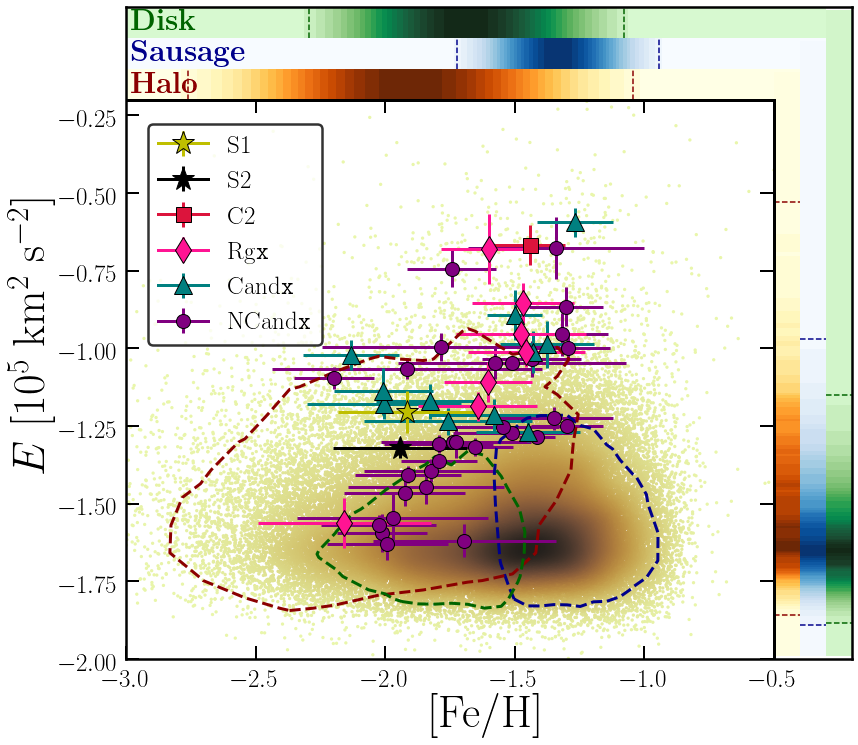

In [40]:
fig,ax1 = MySquarePlot(r'[Fe/H]',r'$E$ [$10^5$ km$^2$ s$^{-2}$]')

ax1.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.turbid,label=None,rasterized=True)

#cmap = cmocean.cm.deep
#cmap = copy(plt.get_cmap(cmap))
#cmap.set_under('white', 1.0)
#ax1.hexbin(df.feh,df.E/1e5,extent=(-3.5,-0.5,-2.0,0.0),gridsize=200,cmap=cmap,vmin=0.001,linewidths=0.2)


# 1
# pltname = 'Shards_Efehdist_first10'
# Examples = names[0:10]
# textlabels = True
# errbars = False


# 2
# pltname = 'Shards_Efehdist_second11'
# Examples = names[10:21]
# textlabels = False
# errbars = False


# 3
# pltname = 'Shards_Efehdist_third30'
# Examples = names[21:]
# errbars = False
# textlabels = False


# 4
pltname = 'Shards_Efehdist_all'
mrkz = ['o','s','d','*','d','^','v','<','>','8','p','h','X','D',]
nm = size(mrkz)
Examples = names[0:]
errbars = True






n_ex = size(Examples)
cols = cm.Dark2(linspace(0,1,n_ex))
Emean = zeros(shape=n_ex)
if errbars==False:
    for i in range(0,n_ex):
        namei = Examples[i]
        Cand = df_S.loc[df_S['group_id'] == namei]
        Cand1 = df.loc[around(df.ra,8).isin(Cand.ra)]
        Emean[i] = amin((Cand1.feh).as_matrix())
    Examples = Examples[argsort(Emean)] 
else:
    Examples = flipud(Examples)

for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand1 = df.loc[around(df.ra,8).isin(Cand.ra)]
    x = (Cand1.feh).as_matrix()
    y = (Cand1.E).as_matrix()/1e5
    
        
    if errbars==True:
        if namei=='S1':
            mrk = '*'
            s = 24
            col1 = 'y'
        if namei=='S2':
            mrk = '*'
            s = 24
            col1 = 'k'
        elif namei=='C2':
            mrk = 's'
            s = 15
            col1 = 'Crimson'
        elif namei[0]=='R':
            mrk = 'd'
            s = 18
            col1 = 'deeppink'
        elif namei[0]=='C':
            mrk = '^'
            s = 18
            col1 = 'teal'    
        elif namei[0]=='N':
            mrk = 'o'
            s = 14
            col1 = 'purple'
        plt.errorbar(mean(x), mean(y), yerr=std(y), xerr=std(x),markersize=s,color=col1,
                     marker=mrk,linewidth=3,markeredgecolor='k')
    else:
        ax1.plot(x,y,'.',color=cols[i,:],markersize=7)
        points = array([x,y]).T
        hull = ConvexHull(points)
        x_edge = points[hull.vertices,0]
        y_edge = points[hull.vertices,1]
        ax1.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.,color=cols[i,:],zorder=2)
        ax1.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=cols[i,:],lw=1.5,zorder=2)
        if textlabels==True:
            if i % 2 != 0:
                tx = amax(x_edge)+0.02
                ty = y_edge[argmax(x_edge)]+0.03
                ax1.text(tx-0.001,ty+0.001,r'{\bf '+namei+r'}',fontsize=25,color='k',horizontalalignment='left',verticalalignment='top')
                ax1.text(tx,ty,r'{\bf '+namei+r'}',fontsize=25,color=cols[i,:],horizontalalignment='left',verticalalignment='top')
            else:
                tx = amin(x_edge)-0.01
                ty = y_edge[argmin(x_edge)]+0.03
                ax1.text(tx-0.001,ty+0.001,r'{\bf '+namei+r'}',fontsize=25,color='k',horizontalalignment='right',verticalalignment='top')
                ax1.text(tx,ty,r'{\bf '+namei+r'}',fontsize=25,color=cols[i,:],horizontalalignment='right',verticalalignment='top')

    
if errbars==True:
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=24,color='y',
                     marker='*',linewidth=3,markeredgecolor='k',label=r'S1')
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=24,color='k',
                     marker='*',linewidth=3,markeredgecolor='k',label=r'S2')
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=15,color='crimson',
                     marker='s',linewidth=3,markeredgecolor='k',label=r'C2') 
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=18,color='deeppink',
                     marker='d',linewidth=3,markeredgecolor='k',label=r'Rg\texttt{x}') 
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=18,color='teal',
                     marker='^',linewidth=3,markeredgecolor='k',label=r'Cand\texttt{x}') 
    plt.errorbar(-1000.0, -1000.0, yerr=std(y), xerr=std(x),markersize=14,color='purple',
                     marker='o',linewidth=3,markeredgecolor='k',label=r'NCand\texttt{x}')
    leg = plt.legend(fontsize=25,frameon=True,edgecolor='k',bbox_to_anchor=(0.03, 0.82), loc=2, borderaxespad=0.)  
    leg.get_frame().set_linewidth(2.5)

cmap_saus = cm.Blues
cmap_halo = cm.YlOrBr
cmap_pro = cmocean.cm.algae

col_saus = 'DarkBlue'
col_halo = 'DarkRed'
col_pro = 'DarkGreen'

FEH,E = meshgrid(linspace(-3.5,-0.3,100),linspace(-0.1,0.0,100))
mu = meens[0,3]
sigsq = covs[0,3,3]
f0 = (1.0/sqrt(2*pi*sigsq))*exp(-(FEH-mu)**2.0/(2*sigsq))
f0 = f0/amax(f0)
plt.contourf(FEH,E,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
ax1.plot([mu-2*sqrt(sigsq),mu-2*sqrt(sigsq)],[-0.1,-0],'--',lw=1.5,color=col_saus)
ax1.plot([mu+2*sqrt(sigsq),mu+2*sqrt(sigsq)],[-0.1,-0],'--',lw=1.5,color=col_saus)

FEH,E = meshgrid(linspace(-3.5,-0.4,100),linspace(-0.2,-0.1,100))
mu = meens[1,3]
sigsq = covs[1,3,3]
f0 = (1.0/sqrt(2*pi*sigsq))*exp(-(FEH-mu)**2.0/(2*sigsq))
f0 = f0/amax(f0)
plt.contourf(FEH,E,f0,30,cmap=cmap_halo,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_halo,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_halo,vmin=0.1,zorder=1)
ax1.plot([mu-2*sqrt(sigsq),mu-2*sqrt(sigsq)],[-0.2,-0.1],'--',lw=1.5,color=col_halo)
ax1.plot([mu+2*sqrt(sigsq),mu+2*sqrt(sigsq)],[-0.2,-0.1],'--',lw=1.5,color=col_halo)


FEH,E = meshgrid(linspace(-3.5,-0.3,100),linspace(0,0.1,100))
mu = meens[2,3]
sigsq = covs[2,3,3]
f0 = (1.0/sqrt(2*pi*sigsq))*exp(-(FEH-mu)**2.0/(2*sigsq))
f0 = f0/amax(f0)
plt.contourf(FEH,E,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
plt.contourf(FEH,E,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
ax1.plot([mu-2*sqrt(sigsq),mu-2*sqrt(sigsq)],[0.0,0.1],'--',lw=1.5,color=col_pro)
ax1.plot([mu+2*sqrt(sigsq),mu+2*sqrt(sigsq)],[0.0,0.1],'--',lw=1.5,color=col_pro)


plt.gcf().text(0.13,0.78,r'{\bf Halo}',color=col_halo,fontsize=30)
plt.gcf().text(0.13,0.818,r'{\bf Sausage}',color=col_saus,fontsize=30)
plt.gcf().text(0.13,0.852,r'{\bf Disk}',color=col_pro,fontsize=30)


Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)



hhalo,Eb = histogram(df.E[imod==1]/1e5,bins=100,range=(-2.0,-0.1))
Ec = (Eb[1:]+Eb[0:-1])/2.0
FEH,EE = meshgrid(linspace(-0.5,-0.4,100),Ec)
f0 = zeros(shape=(100,100))
for i in range(0,100):
    f0[:,i] = hhalo
ax1.contourf(FEH,EE,f0,30,cmap=cmap_halo,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_halo,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_halo,zorder=1)
args = arange(0,100)
cond = args[(log(hhalo)-log(amax(hhalo)))>-4]
lim1 = Ec[cond[0]]
lim2 = Ec[cond[-1]]
ax1.plot([-0.5,-0.4],[lim1,lim1],'--',lw=1.5,color=col_halo)
ax1.plot([-0.5,-0.4],[lim2,lim2],'--',lw=1.5,color=col_halo)


hsaus,Eb = histogram(df.E[imod==0]/1e5,bins=100,range=(-2.0,0.0))
Ec = (Eb[1:]+Eb[0:-1])/2.0
FEH,EE = meshgrid(linspace(-0.4,-0.3,100),Ec)
f0 = zeros(shape=(100,100))
for i in range(0,100):
    f0[:,i] = hsaus
ax1.contourf(FEH,EE,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_saus,vmin=0.1,zorder=1)
args = arange(0,100)
cond = args[(log(hsaus)-log(amax(hsaus)))>-4]
lim1 = Ec[cond[0]]
lim2 = Ec[cond[-1]]
ax1.plot([-0.4,-0.3],[lim1,lim1],'--',lw=1.5,color=col_saus)
ax1.plot([-0.4,-0.3],[lim2,lim2],'--',lw=1.5,color=col_saus)


hpro,Eb = histogram(df.E[imod==2]/1e5,bins=100,range=(-2.0,0.1))
Ec = (Eb[1:]+Eb[0:-1])/2.0
FEH,EE = meshgrid(linspace(-0.3,-0.2,100),Ec)
f0 = zeros(shape=(100,100))
for i in range(0,100):
    f0[:,i] = hpro
ax1.contourf(FEH,EE,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
ax1.contourf(FEH,EE,f0,30,cmap=cmap_pro,vmin=0.1,zorder=1)
args = arange(0,100)
cond = args[(log(hpro)-log(amax(hpro)))>-4]
lim1 = Ec[cond[0]]
lim2 = Ec[cond[-1]]
ax1.plot([-0.3,-0.2],[lim1,lim1],'--',lw=1.5,color=col_pro)
ax1.plot([-0.3,-0.2],[lim2,lim2],'--',lw=1.5,color=col_pro)



ax1.plot([-3,-0.5],[-0.2,-0.2],'k-',lw=3)
ax1.plot([-0.5,-0.5],[-2.0,-0.2],'k-',lw=3)

ax1.set_xlim([-3.0,-0.2])
ax1.set_ylim([-2.0,0.1])
ax1.tick_params(top=False,right=False)

# contours
if errbars==True:
    levels = [-2,0]
    
    H,xb,yb = histogram2d(df.feh[imod==0],df.E[imod==0]/1e5,bins=20,normed=True)
    xc =(xb[1:]+xb[0:-1])/2
    yc = (yb[1:]+yb[0:-1])/2
    H = log(H/amax(H))
    H[H==-inf] = -1000
    plt.contour(xc,yc,H.T,levels=levels,colors=col_saus,linestyles='--',linewidths=3)


    H,xb,yb = histogram2d(df.feh[imod==1],df.E[imod==1]/1e5,bins=20,normed=True)
    xc =(xb[1:]+xb[0:-1])/2
    yc = (yb[1:]+yb[0:-1])/2
    H = log(H/amax(H))
    H[H==-inf] = -1000
    plt.contour(xc,yc,H.T,levels=levels,colors=col_halo,linestyles='--',linewidths=3)

    H,xb,yb = histogram2d(df.feh[imod==2],df.E[imod==2]/1e5,bins=20,normed=True)
    xc =(xb[1:]+xb[0:-1])/2
    yc = (yb[1:]+yb[0:-1])/2
    H = log(H/amax(H))
    H[H==-inf] = -1000
    plt.contour(xc,yc,H.T,levels=levels,colors=col_pro,linestyles='--',linewidths=3)

    
xtx = ax1.get_xticks()
ytx = ax1.get_yticks()
for i in range(0,size(xtx)):
    ax1.plot([xtx[i],xtx[i]],[-0.24,-0.2],'k-',lw=2)
for i in range(0,size(xtx)):
    ax1.plot([-0.55,-0.5],[ytx[i],ytx[i]],'k-',lw=2)
    
ax1.set_yticks(ytx[0:-2])
      
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [31]:
amax(f0)

1774.0